# Explore preprocessed Kickstarter data

### _Lukas Vlcek_

Get to know basic statistics, distributions, and correlations in the data.

## 1. Setup

## Notebook configuration

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Create a dataframe from a pre-processed CSV file

In [2]:
target_path = '../data/interim/kickstarter_csvs'
source_path = '../data/processed'
filename = 'kick_idf.csv'

In [3]:
# list of columns, which should be in datetime format
datecols = ['created_at', 'deadline', 'state_changed_at', 'launched_at']

In [4]:
# Function for converting from a timestamp to a datetime string
fdatpars = lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [5]:
# Read-in a pre-processed CSV file, index based on project ID
#df = pd.read_csv(os.path.join(source_path, filename), index_col='id', parse_dates=datecols, date_parser=fdatpars)
df = pd.read_csv(os.path.join(source_path, filename), index_col='id', parse_dates=datecols)

## Look at the DF properties and contents

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263765 entries, 18520 to 2147476221
Data columns (total 18 columns):
name                263764 non-null object
goal                263765 non-null float64
pledged             263765 non-null float64
usd_pledged         263765 non-null float64
state               263765 non-null object
slug                263765 non-null object
country             263765 non-null object
currency            263765 non-null object
deadline            263765 non-null datetime64[ns]
state_changed_at    263765 non-null datetime64[ns]
created_at          263765 non-null datetime64[ns]
launched_at         263765 non-null datetime64[ns]
staff_pick          263765 non-null bool
backers_count       263765 non-null int64
blurb               263750 non-null object
spotlight           263765 non-null bool
category            263765 non-null object
cat_type            263765 non-null object
dtypes: bool(2), datetime64[ns](4), float64(3), int64(1), object(8)
memory us

In [7]:
# Look at the data
df.head(2)

,name,goal,pledged,usd_pledged,state,slug,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,blurb,spotlight,category,cat_type
id,,,,,,,,,,,,,,,,,,
18520,Grandma's are Life,15000.0,62.0,62.000000,failed,grandmas-are-life,US,USD,2016-11-18 09:32:40,2016-11-18 09:32:40,2016-10-19 08:13:18,2016-10-19 09:32:40,False,4,Raising money to help my grandmother recover f...,False,music/world music,music
21109,Meta,150.0,173.0,258.036032,successful,meta,GB,GBP,2015-05-06 17:00:00,2015-05-06 17:00:12,2015-04-07 10:07:05,2015-04-07 18:37:44,False,11,My work is performance based but I branch out ...,True,art/performance art,art


In [8]:
df['name'].str.contains('Trump ').sum()

138

## 2. Basic statistics for different features (columns)

successful    111814
failed        111621
live           24357
canceled       15021
suspended        952
Name: state, dtype: int64


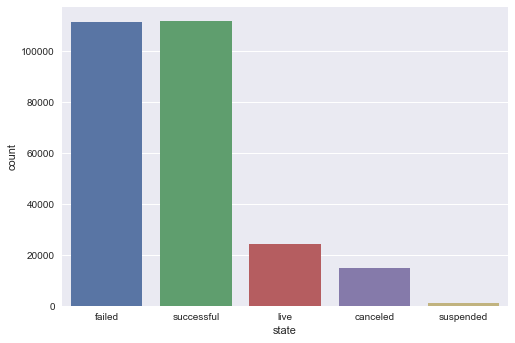

In [9]:
# State of the projects success, fail, ...
print(df['state'].value_counts())
sns.countplot(x='state', data=df)

### Notes
* About half the projects were successful (the funding process)
* This does not seem to match the info I got before (~34%) - why?
* I may have deleted resubmittals during preprocessing ??? - not likely, but look into it

#### Category type statistics

In [10]:
# Counts of different category types
print('Number of category types:', df['cat_type'].value_counts().shape[0])
print(df['cat_type'].value_counts())

Number of category types: 15
film & video    39441
music           36476
publishing      31807
technology      26736
games           25599
art             21090
design          16558
fashion         16024
food            15688
comics           8078
photography      6847
theater          6289
crafts           5743
journalism       4302
dance            3087
Name: cat_type, dtype: int64


### Money - goals and pledges (promised funding)

In [11]:
df['goal'].describe()

count    2.637650e+05
mean     4.671028e+04
std      1.139242e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [12]:
df['usd_pledged'].describe()

count    2.637650e+05
mean     1.085461e+04
std      1.029759e+05
min      0.000000e+00
25%      4.842330e+01
50%      9.250000e+02
75%      5.125000e+03
max      2.033899e+07
Name: usd_pledged, dtype: float64

In [13]:
n_max = df.loc[df['goal'] == 1e8]['category'].shape[0]
print('Number of maximum goals:', n_max)
df.loc[df['goal'] == 1e8]['category'].value_counts()

Number of maximum goals: 23


film & video/drama              2
film & video/movie theaters     2
journalism/video                2
food/restaurants                1
film & video/action             1
technology/software             1
technology/web                  1
games/live games                1
film & video/animation          1
film & video/science fiction    1
film & video/documentary        1
art/illustration                1
fashion/apparel                 1
games/video games               1
film & video/fantasy            1
film & video/horror             1
publishing/young adult          1
design/architecture             1
art/painting                    1
technology/space exploration    1
Name: category, dtype: int64

### Look at the extreme goals - what are they thinking?

In [14]:
df_max = df.loc[df['goal'] == 1e8][['name','category','usd_pledged','backers_count','country','blurb']].sort_values(by='category').reset_index()
df_max

,id,name,category,usd_pledged,backers_count,country,blurb
0,1720842777,NAKED FASHION ART,art/illustration,0.000000,0,CA,Fashion illustration as a portrait.
1,208731425,Animal - The Bear Life Journey,art/painting,10.000000,1,US,Fine Art By Kyle South
2,601594365,The Multi-Trillion Dollar Dream™ (Canceled),design/architecture,1.000000,1,US,We are designing The Multi-Trillion Dollar Dre...
3,388031956,UniqueTrends,fashion/apparel,1.000000,1,US,UniqueTrends. Lasting memories that never go ...
4,308045282,Jesus Priest,film & video/action,0.799988,1,CA,This is NOT a religious movie project despite ...
5,962949560,"""PG"" Reanimated Cartoons Tha Movie",film & video/animation,0.000000,0,US,"This cartoon is about the main character ""PG"" ..."
6,843636303,"The Exodus, one Ark or many.",film & video/documentary,13.000000,4,US,To purchase cruise ships and redesign them to ...
7,2000749004,A Celtic Lovestory,film & video/drama,0.000000,0,GB,"A 2000 year old ""Romeo & Juliet"" love story, s..."
8,1485385229,This Land Called America,film & video/drama,26.754190,3,SE,A feature film based around the script This La...
9,1168153740,Sage: Warrior Of The Fallen Gods (Movie),film & video/fantasy,0.000000,0,US,"Sage: Warrior Of The Fallen Gods, The rise and..."


* Flat Earth (17)
* Give me millions and let me write about it (19)
* New currency (20)
* Trump (18)
* Higher percentage of the extreme goals seems to come from outside US

In [15]:
# Flat Earth
print(df_max.loc[17][6])

Help us raise money for an expedition to the Antarctic. We will document and study the edge of the Earth. Let's finally prove its flat!


In [16]:
# Billionaire boy
print(df_max.loc[19][6])

An exclusive blog about a 18 year old millionaire.
The blod will consist of fashion, cars, sport, travelling and much more.


In [17]:
# New currency
print(df_max.loc[20][6])

CF is an independent currency system and a trading tool that runs parallel to all existing currency systems.


In [18]:
# Trump
print(df_max.loc[18][6])

You might be asking why I decided to call it "Trump Media," well its simple. Our media will "trump" the lame stream media


In [19]:
# US vs WORLD
us_max  = df.loc[(df['goal'] == 1e8) & (df['country'] == 'US')].shape[0]
world_max = df.loc[(df['goal'] == 1e8)].shape[0]
us_all  = df.loc[df['country'] == 'US'].shape[0]
world_all = df.shape[0]

print('All goals - US/World:', us_all/world_all)
print('Max goals - US/World:', us_max/world_max)

All goals - US/World: 0.7719674710443007
Max goals - US/World: 0.5652173913043478


### Some other count statistics

Number of countries: 22


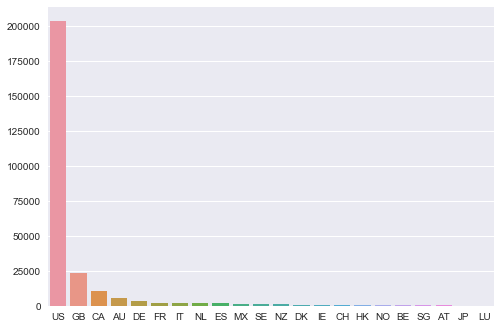

In [20]:
# Number of projects from different countries
print('Number of countries:', df['country'].value_counts().shape[0])
a = df['country'].value_counts()
sns.barplot(a.index, a.values)

In [21]:
# How often staff picks a project?
df['staff_pick'].value_counts()

False    234750
True      29015
Name: staff_pick, dtype: int64

In [22]:
# How often is a project highlighted
df['spotlight'].value_counts()

False    151951
True     111814
Name: spotlight, dtype: int64

## 3. Relations and correlations in the data

### Goals vs. pledged

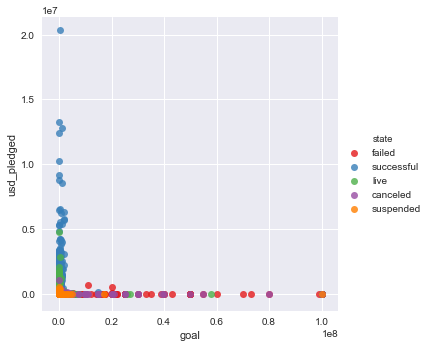

In [23]:
sns.lmplot(x='goal', y='usd_pledged', hue='state', data=df, fit_reg=False, palette='Set1')

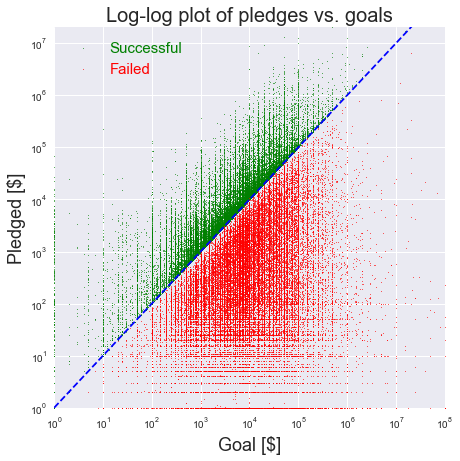

In [24]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("goal", "pledged", df.loc[df.state == 'successful'], scatter_kws={"s": 1}, fit_reg=False, color='green',label='Successful')
sns.regplot("goal", "pledged", df.loc[df.state == 'failed'], scatter_kws={"s": 1}, fit_reg=False, color='red',label='Failed')
plt.plot([1,1e8],[1,1e8],linestyle='--', color='blue')
plt.xlim(1,df.goal.max())
plt.ylim(1,df.usd_pledged.max())
plt.xlabel('Goal [$]', fontsize=18)
plt.ylabel('Pledged [$]', fontsize=18)
leg = plt.legend(fontsize=15)
leg.get_texts()[0].set_color('green')
leg.get_texts()[1].set_color('red')
plt.title('Log-log plot of pledges vs. goals', fontsize=20)

Why is the logarithmic scale much more regular (sort of gaussian?) Lognormal distribution. People think in orders of magnitude? Difference between 100 and 200 seems same as between 1000 and 2000.

(1, 100000000.0)

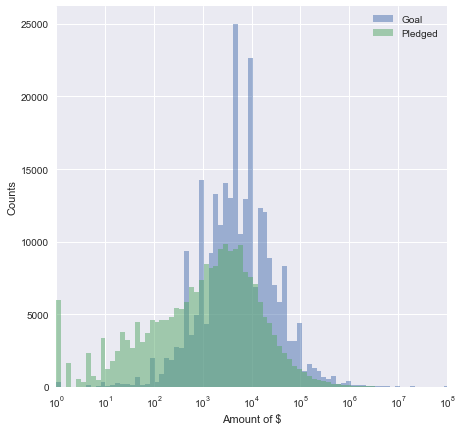

In [25]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
logbins=np.logspace(0, 18, num=180, endpoint=True)
plt.hist(df['goal'], bins=logbins, alpha=0.5, label='Goal')
plt.hist(df['pledged'], bins=logbins, alpha=0.5, label='Pledged')
plt.legend()
plt.xlabel('Amount of $')
plt.ylabel('Counts')
plt.xlim(1,df.goal.max())

(1e-05, 100000.0)

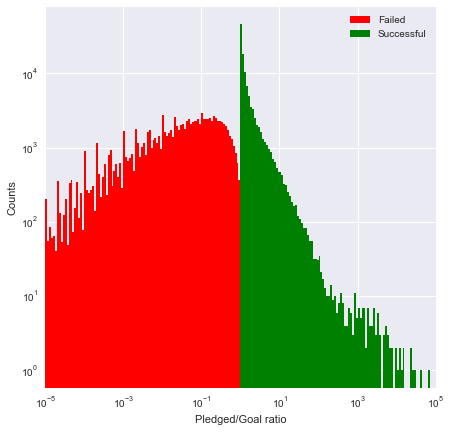

In [26]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale='log')
logbins=np.logspace(-5, 5, num=201, endpoint=True)
ratio = df['pledged']/df['goal']
success = ratio > 1.0
#plt.hist(ratio, bins=logbins, label='Failed', normed=False)
plt.hist(ratio[np.logical_not(success)], bins=logbins, color='red', label='Failed')
plt.hist(ratio[success], bins=logbins, color='green', label='Successful')
#plt.vlines(1.0, 1e-10, 1e4)
plt.legend()
plt.xlabel('Pledged/Goal ratio')
plt.ylabel('Counts')
plt.xlim(1e-5,1e5)
#plt.ylim(1e-5,1e5)

In [27]:
df.head()

,name,goal,pledged,usd_pledged,state,slug,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,blurb,spotlight,category,cat_type
id,,,,,,,,,,,,,,,,,,
18520,Grandma's are Life,15000.0,62.0,62.000000,failed,grandmas-are-life,US,USD,2016-11-18 09:32:40,2016-11-18 09:32:40,2016-10-19 08:13:18,2016-10-19 09:32:40,False,4,Raising money to help my grandmother recover f...,False,music/world music,music
21109,Meta,150.0,173.0,258.036032,successful,meta,GB,GBP,2015-05-06 17:00:00,2015-05-06 17:00:12,2015-04-07 10:07:05,2015-04-07 18:37:44,False,11,My work is performance based but I branch out ...,True,art/performance art,art
24380,Puss N' Books: A relaxing cat cafe and bookstore.,20000.0,776.0,776.000000,failed,puss-n-books-a-relaxing-cat-cafe-and-bookstore,US,USD,2015-11-26 11:25:33,2015-11-26 11:25:33,2015-10-25 11:32:25,2015-10-27 11:25:33,False,18,A sanctuary for humans and felines alike! Come...,False,food/spaces,food
33867,TASTE MAKERS BY TRISH P,18000.0,2798.0,2271.723453,failed,taste-makers-by-trish-p,CA,CAD,2015-07-30 14:28:11,2015-07-30 14:28:11,2015-03-15 00:40:34,2015-06-15 14:28:11,True,42,Taste Makers is a socially conscious brand tha...,False,fashion/ready-to-wear,fashion
39036,The Meat Candy Experience,2500.0,3239.0,3239.000000,successful,the-meat-candy-experience,US,USD,2016-06-30 18:34:18,2016-06-30 18:34:18,2016-05-15 14:58:21,2016-05-16 18:34:18,False,68,"The BEST beef sticks, beef jerky and signature...",True,food/small batch,food


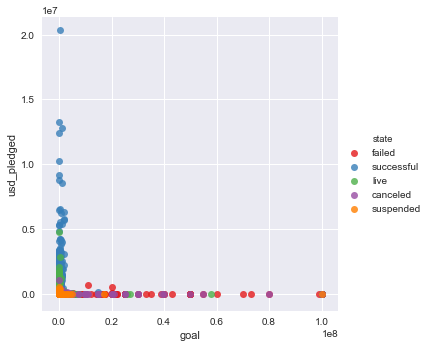

In [28]:
sns.lmplot(x='goal', y='usd_pledged', hue='state', data=df, fit_reg=False, palette='Set1')

* There seems to be inverse relationship between the goal and amount pledged
* Successful funding campain should be easier with lower target, but asking less also helps to get more money
* Lowballing a good strategy?
    * May get staff endorsment
    * Better perception of achievability
    * Large funding goals scare people away
    * Large funding goals may be correlate with poor planning or crackpot ideas?

## Staff picks, highlight - are they predictive?

In [29]:
n_SxP = df.loc[(df['state'] == 'successful') & (df['staff_pick'] == True)].shape[0]
n_FxP = df.loc[(df['state'] == 'failed') & (df['staff_pick'] == True)].shape[0]
n_SxN = df.loc[(df['state'] == 'successful') & (df['staff_pick'] == False)].shape[0]
n_FxN = df.loc[(df['state'] == 'failed') & (df['staff_pick'] == False)].shape[0]
n_S = df.loc[(df['state'] == 'successful')].shape[0]
n_F = df.loc[(df['state'] == 'failed')].shape[0]
print("Success rate of a random project:      ", n_S/(n_S+n_F))
print("Success rate of a staff-picked project:",n_SxP/(n_SxP + n_FxP))
print("Success rate of a non-picked project:  ",n_SxN/(n_SxN + n_FxN))

Success rate of a random project:       0.5004318929442567
Success rate of a staff-picked project: 0.8619829862129657
Success rate of a non-picked project:   0.4501664432130422


* Can a predictive model beat that?
* Can a model predict a staff pick?

In [30]:
n_SxS = df.loc[(df['state'] == 'successful') & (df['spotlight'] == True)].shape[0]
n_FxS = df.loc[(df['state'] == 'failed') & (df['spotlight'] == True)].shape[0]
n_SxN = df.loc[(df['state'] == 'successful') & (df['spotlight'] == False)].shape[0]
n_FxN = df.loc[(df['state'] == 'failed') & (df['spotlight'] == False)].shape[0]
print("Success rate of a spotlighted project    :",n_SxS/(n_SxS + n_FxS))
print("Success rate of a non-spotlighted project:",n_SxN/(n_SxN + n_FxN))

Success rate of a spotlighted project    : 1.0
Success rate of a non-spotlighted project: 0.0


* Looks like projects are spotlighted only after they have succeeded

### Fun with countries - any general characteristics?

(0, 1000000.0)

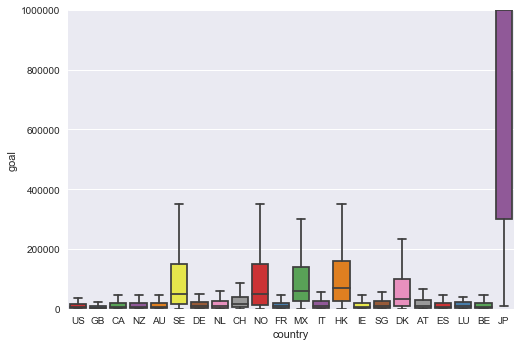

In [31]:
sns.boxplot(x='country', y='goal', data=df, palette='Set1', fliersize=0)
plt.ylim(0,1e6)

(0, 20000.0)

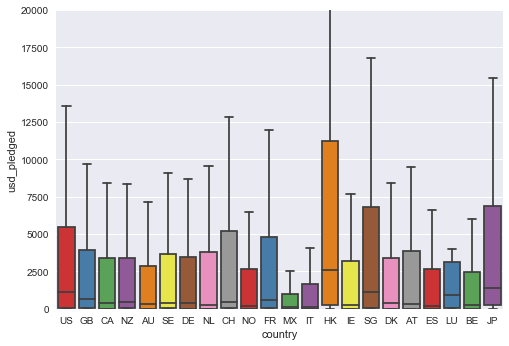

In [32]:
sns.boxplot(x='country', y='usd_pledged', data=df, palette='Set1', fliersize=0)
plt.ylim(0,2e4)

* 22 countries 
* Asian countries (HK, SG, JP) get a lot, no matter how much they ask
* Hong Kong asks a lot and gets a lot
* Japanese ask the most, get good funding (could there be some currency mess-up with Japanese Yen?)
* Singapore (SG) and Swiss (CH) don't ask much, but get a lot 
* Scandinavian countries ask a lot - get same as other Europeans
* Mexicans ask a lot, get the least
* Americans don't ask much, but still are funded well

Can unsupervised methods group countries by their geography?
* What decides? - culture, GDP, types of popular projects

#### Other notes
* Find a function that may describe positive feedback - the more you have been funded, the more likely you will get more
* May need to collect funding of the same project over time to see the rise in funding

In [33]:
df.loc[(df['country'] == 'JP')]['cat_type'].value_counts()

design          19
games           16
technology      11
fashion          9
music            8
film & video     8
photography      2
publishing       1
art              1
theater          1
crafts           1
Name: cat_type, dtype: int64

In [34]:
df.loc[(df['country'] == 'DK')]['cat_type'].value_counts()

technology      177
design          106
film & video     86
music            79
art              74
publishing       73
games            71
fashion          65
food             39
crafts           25
photography      24
journalism       20
theater          13
comics           11
dance             3
Name: cat_type, dtype: int64

In [35]:
df.loc[(df['country'] == 'MX')]['cat_type'].value_counts()

film & video    285
technology      190
music           186
publishing      145
art             136
games           126
design           84
food             81
fashion          67
theater          63
crafts           46
journalism       33
comics           31
photography      24
dance            21
Name: cat_type, dtype: int64

* Japan - heavily in tehcnology may correlated with higher financial cost
* Denmark - typical?
* Mexico - relatively more in art/craft/dance
* Plot these as a barchart for select countries

In [36]:
ct_jp = df.loc[(df['country'] == 'JP')]['cat_type'].value_counts()
ct_hk = df.loc[(df['country'] == 'HK')]['cat_type'].value_counts()
ct_sg = df.loc[(df['country'] == 'SG')]['cat_type'].value_counts()
ct_mx = df.loc[(df['country'] == 'MX')]['cat_type'].value_counts()
ct_dk = df.loc[(df['country'] == 'DK')]['cat_type'].value_counts()
ct_se = df.loc[(df['country'] == 'SE')]['cat_type'].value_counts()
ct_no = df.loc[(df['country'] == 'NO')]['cat_type'].value_counts()
df_ct = pd.DataFrame()
df_ct['jp'] = ct_jp
df_ct['hk'] = ct_hk
df_ct['sg'] = ct_sg
df_ct['mx'] = ct_mx
df_ct['dk'] = ct_dk
df_ct['se'] = ct_se
df_ct['no'] = ct_no
df_ct = df_ct[['jp','hk','sg','dk','se','no','mx']].transform(lambda x: x / x.sum())
df_ct

,jp,hk,sg,dk,se,no,mx
design,0.246753,0.395390,0.282051,0.133670,0.095638,0.095339,0.062130
games,0.207792,0.131206,0.121212,0.089533,0.166107,0.122881,0.093195
technology,0.142857,0.278369,0.160839,0.223203,0.129195,0.216102,0.140533
fashion,0.116883,0.062057,0.181818,0.081967,0.089765,0.072034,0.049556
music,0.103896,0.008865,0.018648,0.099622,0.109060,0.135593,0.137574
film & video,0.103896,0.023050,0.034965,0.108449,0.127517,0.116525,0.210799
photography,0.025974,0.007092,0.013986,0.030265,0.039430,0.031780,0.017751
publishing,0.012987,0.026596,0.062937,0.092055,0.134228,0.116525,0.107249
art,0.012987,0.042553,0.051282,0.093317,0.074664,0.050847,0.100592
theater,0.012987,NaN,0.025641,0.016393,0.015101,0.019068,0.046598


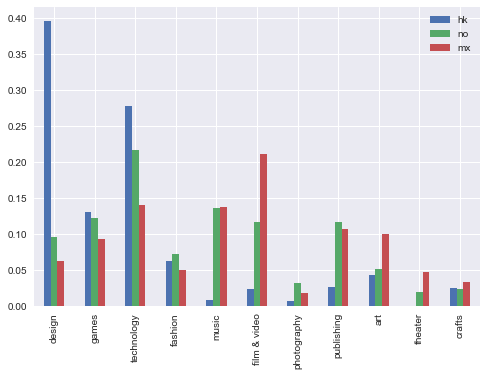

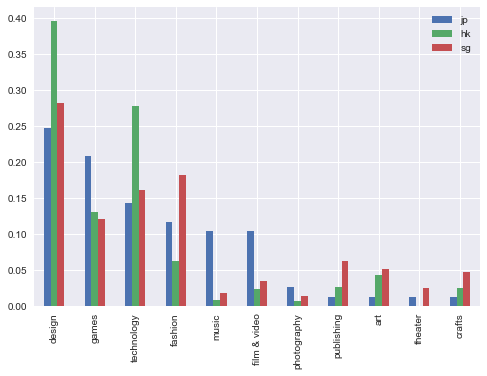

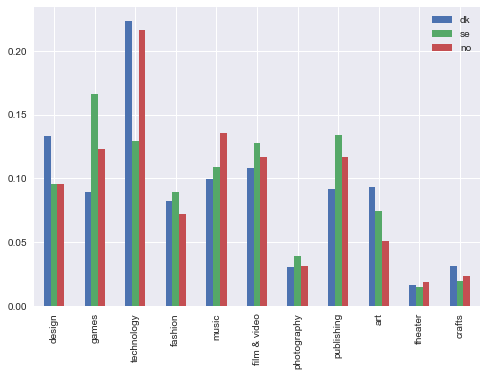

In [37]:
df_ct.plot(y=['hk','no','mx'], kind='bar')
df_ct.plot(y=['jp','hk','sg'], kind='bar')
df_ct.plot(y=['dk','se','no'], kind='bar')

In [38]:
#plt.figure(1, (15,10))
#plt.subplot(1, 2, 1)
#sns.barplot(ct_jp.index, ct_jp.values/np.sum(ct_jp.values), color='purple', alpha=0.5)
#sns.barplot(ct_dk.index, ct_dk.values/np.sum(ct_dk.values), color='blue', alpha=0.5)
#plt.title("Denmark (blue) vs  Japan (purple)")
#plt.xticks(rotation=90)
#plt.subplot(1, 2, 2)
#sns.barplot(ct_mx.index, ct_mx.values/np.sum(ct_mx.values), color='green', alpha=0.5)
#sns.barplot(ct_dk.index, ct_dk.values/np.sum(ct_dk.values), color='blue', alpha=0.5)
#plt.title("Denmark (blue) vs Mexico (green)")
#plt.xticks(rotation=90)

In [ ]:
pt = df.pivot_table(index='country', columns='state', values='goal', aggfunc='count')
#print(pt)
x = (pt['successful']/(pt.sum(axis='columns'))).to_frame(name='ratio').sort_values(by='ratio', ascending=False)
sns.barplot(x=x.index, y='ratio', data=x)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('fraction of successful projects')
plt.title('Fraction of successful projects by country')